In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#from google.colab import drive
#drive.mount('/content/gdrive/', force_remount = True)

In [ ]:
%cd /content/gdrive/My Drive/optimum/20210612_DL_reg_cls

## training phenotype data

In [3]:
tr_phe_conti = pd.read_csv("pheno_n300_conti.phe", sep = '\t', names = ['family_id', 'individual_id', 'phenotype_1', 'phenotype_2'])
tr_phe_bn = pd.read_csv("pheno_n300_binary.phe", sep = '\t', names = ['family_id', 'individual_id', 'phenotype_1', 'phenotype_2'])

In [4]:
tr_phe_conti = tr_phe_conti.astype('float64')

In [5]:
tr_phe_bn = tr_phe_bn.astype('int64')

## training genotype data

In [6]:
tr_ge_mldose = pd.read_csv('sim_n300_p1000.mldose', sep = '\t', names = ['family_id', 'individual_id'] + [f'snp{i}' for i in range(1, 1001)])
tr_ge_mlinfo = pd.read_csv('sim_n300_p1000.mlinfo', sep = '\t')

## test phenotype data

In [7]:
te_phe_conti = pd.read_csv("pheno_n150_conti.phe", sep = '\t', names = ['family_id', 'individual_id', 'phenotype_1', 'phenotype_2'])
te_phe_bn = pd.read_csv("pheno_n150_binary.phe", sep = '\t', names = ['family_id', 'individual_id', 'phenotype_1', 'phenotype_2'])

In [8]:
te_phe_conti = te_phe_conti.astype('float64')

In [9]:
te_phe_bn = te_phe_bn.astype('int64')

## test genotype data

In [10]:
te_ge_mldose = pd.read_csv('sim_n150_p1000.mldose', sep = '\t', names = ['family_id', 'individual_id'] + [f'snp{i}' for i in range(1, 1001)])
te_ge_mlinfo = pd.read_csv('sim_n150_p1000.mlinfo', sep = '\t')

## Target Data 

In [11]:
target_c1 = te_phe_conti.phenotype_1
target_c2 = te_phe_conti.phenotype_2

In [12]:
target_b1 = te_phe_bn.phenotype_1
target_b2 = te_phe_bn.phenotype_2

### Moldeing Package Import

In [13]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor, \
ExtraTreesClassifier, ExtraTreesRegressor, AdaBoostClassifier, AdaBoostRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.svm import SVR, SVC

from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

## Make Data

### - Make Original Data Set

In [14]:
X = tr_ge_mldose.iloc[:, 2:]

In [15]:
target = te_ge_mldose.iloc[:, 2:]

### - Make Data MinMaxScaled

In [16]:
scaler = MinMaxScaler()

In [17]:
scaled_x = scaler.fit_transform(X)

In [18]:
scaled_target = scaler.transform(target)

## Moldeing & Score

### 1. Regression

In [19]:
gb_r = GradientBoostingRegressor(random_state = 612, max_depth = 4)
svr = SVR()
lgbm_r = LGBMRegressor(random_state = 612, max_depth = 3)
rf_r = RandomForestRegressor(random_state = 612)
etc_r = ExtraTreesRegressor(random_state = 612)
adb_r = AdaBoostRegressor(random_state = 612)
xgb_r = XGBRegressor(random_state = 612, max_depth = 3)

In [20]:
y_c1 = tr_phe_conti.phenotype_1
y_c2 = tr_phe_conti.phenotype_2

In [21]:
reg_models = [gb_r, svr, lgbm_r, rf_r, etc_r, adb_r, xgb_r]

In [22]:
reg_model_names = [x.__class__.__name__ for x in reg_models]

### Custom Function

In [23]:
def get_rmse(x, y, target_x, target_y) :
    rmse_list = []
    for model in reg_models :
        model.fit(x, y)
        
        pred = model.predict(target_x)
        
        rmse = mean_squared_error(target_y, pred)
        rmse_list.append(rmse)
        print(f'{model.__class__.__name__}의 RMSE : {rmse}')
    return rmse_list

- Original Data

In [24]:
tc1 = get_rmse(X, y_c1, target, target_c1)

GradientBoostingRegressor의 RMSE : 0.8514001053429748
SVR의 RMSE : 0.7278016412389754
LGBMRegressor의 RMSE : 0.727489591967356
RandomForestRegressor의 RMSE : 0.7575681003670636
ExtraTreesRegressor의 RMSE : 0.8018454137517392
AdaBoostRegressor의 RMSE : 0.7578437397070037
XGBRegressor의 RMSE : 0.7471830972908193


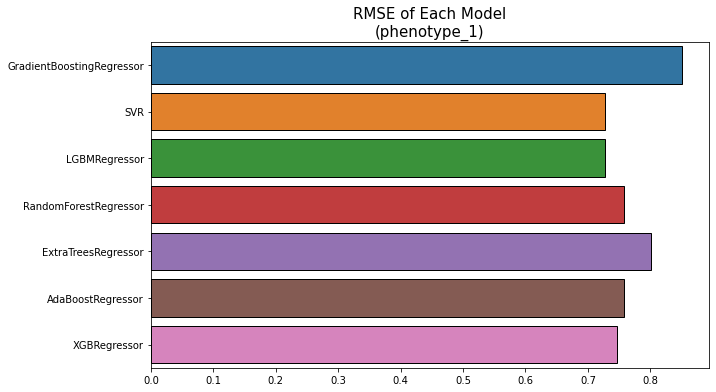

In [25]:
plt.figure(figsize = (10, 6))
plt.title('RMSE of Each Model\n(phenotype_1)', size = 15)
sns.barplot(y = reg_model_names, x = tc1, edgecolor = (0, 0, 0))
plt.show()

In [26]:
tc2 = get_rmse(X, y_c2, target, target_c2)

GradientBoostingRegressor의 RMSE : 1.1377784398586517
SVR의 RMSE : 1.0978779426985743
LGBMRegressor의 RMSE : 1.091153214648743
RandomForestRegressor의 RMSE : 1.093569897410248
ExtraTreesRegressor의 RMSE : 1.1509990226285454
AdaBoostRegressor의 RMSE : 1.149328665380851
XGBRegressor의 RMSE : 1.1173162951424997


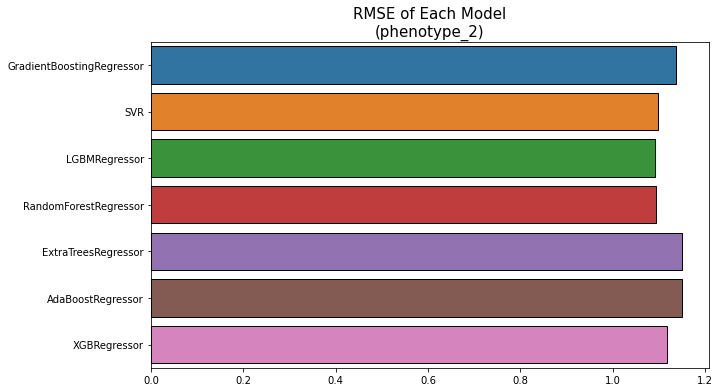

In [27]:
plt.figure(figsize = (10, 6))
plt.title('RMSE of Each Model\n(phenotype_2)', size = 15)
sns.barplot(y = reg_model_names, x = tc2, edgecolor = (0, 0, 0))
plt.show()

- Scaling

In [28]:
stc1 = get_rmse(scaled_x, y_c1, scaled_target, target_c1)

GradientBoostingRegressor의 RMSE : 0.8507649477227243
SVR의 RMSE : 0.7242877471672009
LGBMRegressor의 RMSE : 0.7135086505458016
RandomForestRegressor의 RMSE : 0.7574489734870443
ExtraTreesRegressor의 RMSE : 0.801654691829908
AdaBoostRegressor의 RMSE : 0.7629151454552664
XGBRegressor의 RMSE : 0.7471830972908193


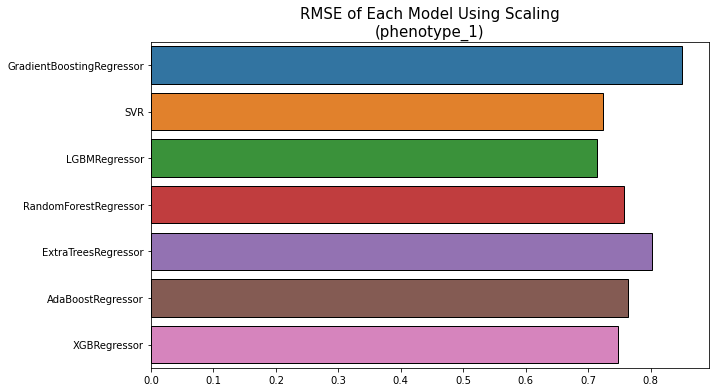

In [29]:
plt.figure(figsize = (10, 6))
plt.title('RMSE of Each Model Using Scaling\n(phenotype_1)', size = 15)
sns.barplot(y = reg_model_names, x = stc1, edgecolor = (0, 0, 0))
plt.show()

In [30]:
stc2 = get_rmse(scaled_x, y_c2, scaled_target, target_c2)

GradientBoostingRegressor의 RMSE : 1.141850754829152
SVR의 RMSE : 1.097340589926027
LGBMRegressor의 RMSE : 1.091153214648743
RandomForestRegressor의 RMSE : 1.0929089072328282
ExtraTreesRegressor의 RMSE : 1.1509990226285454
AdaBoostRegressor의 RMSE : 1.2176523216068111
XGBRegressor의 RMSE : 1.1173061151876755


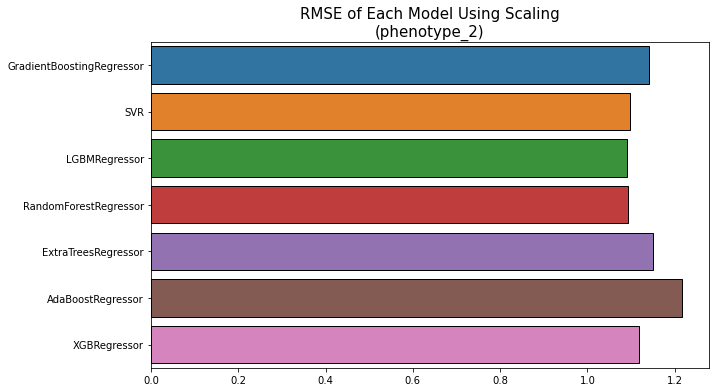

In [31]:
plt.figure(figsize = (10, 6))
plt.title('RMSE of Each Model Using Scaling\n(phenotype_2)', size = 15)
sns.barplot(y = reg_model_names, x = stc2, edgecolor = (0, 0, 0))
plt.show()

### 2. Classification

In [32]:
gb_c = GradientBoostingClassifier(random_state = 612, max_depth = 3)
svc = SVC(probability = True)
lgbm_c = LGBMClassifier(random_state = 612, max_depth = 3)
rf_c = RandomForestClassifier(random_state = 612)
etc_c = ExtraTreesClassifier(random_state = 612)
xgb_c = XGBClassifier(random_state = 612, max_depth = 3)

In [33]:
y_b1 = tr_phe_bn.phenotype_1
y_b2 = tr_phe_bn.phenotype_2

In [34]:
clf_models = [gb_c, svc, lgbm_c, rf_c, xgb_c, etc_c]

In [35]:
clf_model_names = [x.__class__.__name__ for x in clf_models]

### Custom Function

In [36]:
def get_acc(x, y, target_x, target_y) :
    acc_list = []
    for model in clf_models :
        model.fit(x, y)
        
        pred = model.predict_proba(target_x)[:, 1]
        label = (pred > .3).astype(int)
        acc = accuracy_score(target_y, label)
        acc_list.append(acc)
        print(f'{model.__class__.__name__}의 accuracy : {acc}')
    return acc_list

- Original Data

In [37]:
tb1 = get_acc(X, y_b1, target, target_b1)

GradientBoostingClassifier의 accuracy : 0.82
SVC의 accuracy : 0.8066666666666666
LGBMClassifier의 accuracy : 0.84
RandomForestClassifier의 accuracy : 0.7866666666666666
[16:02:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier의 accuracy : 0.7933333333333333
ExtraTreesClassifier의 accuracy : 0.7733333333333333


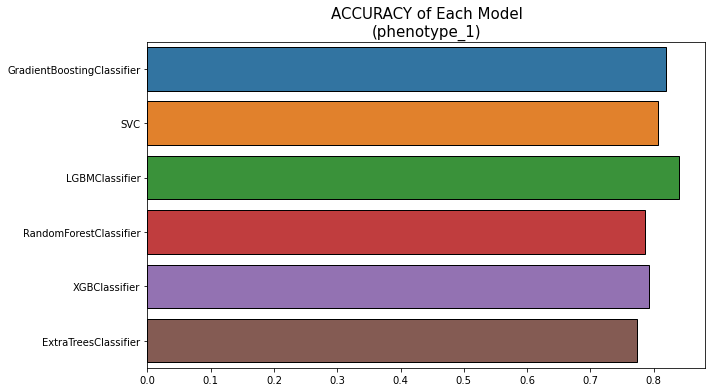

In [38]:
plt.figure(figsize = (10, 6))
plt.title('ACCURACY of Each Model\n(phenotype_1)', size = 15)
sns.barplot(y = clf_model_names, x = tb1, edgecolor = (0, 0, 0))
plt.show()

In [39]:
tb2 = get_acc(X, y_b2, target, target_b2)

GradientBoostingClassifier의 accuracy : 0.78
SVC의 accuracy : 0.8266666666666667
LGBMClassifier의 accuracy : 0.7866666666666666
RandomForestClassifier의 accuracy : 0.8133333333333334
[16:12:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier의 accuracy : 0.7933333333333333
ExtraTreesClassifier의 accuracy : 0.8333333333333334


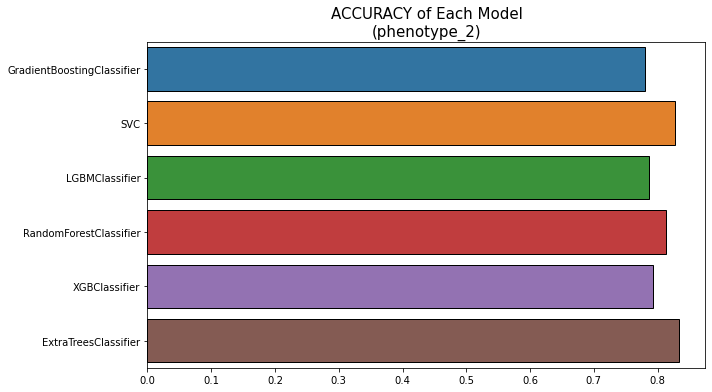

In [40]:
plt.figure(figsize = (10, 6))
plt.title('ACCURACY of Each Model\n(phenotype_2)', size = 15)
sns.barplot(y = clf_model_names, x = tb2, edgecolor = (0, 0, 0))
plt.show()

- Scaling

In [41]:
stb1 = get_acc(scaled_x, y_b1, scaled_target, target_b1)

GradientBoostingClassifier의 accuracy : 0.82
SVC의 accuracy : 0.8
LGBMClassifier의 accuracy : 0.8266666666666667
RandomForestClassifier의 accuracy : 0.78
[16:12:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier의 accuracy : 0.7933333333333333
ExtraTreesClassifier의 accuracy : 0.7733333333333333


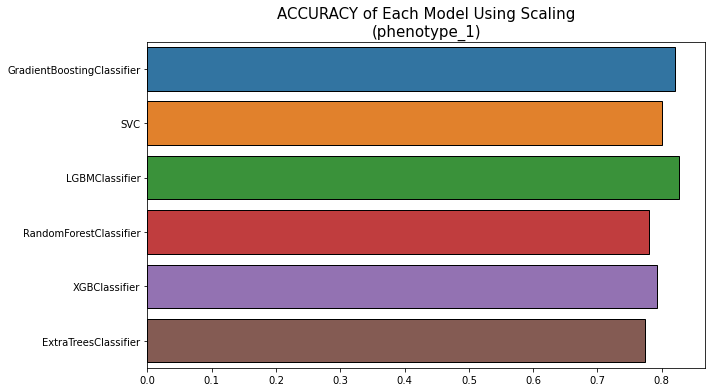

In [42]:
plt.figure(figsize = (10, 6))
plt.title('ACCURACY of Each Model Using Scaling\n(phenotype_1)', size = 15)
sns.barplot(y = clf_model_names, x = stb1, edgecolor = (0, 0, 0))
plt.show()

In [43]:
stb2 = get_acc(scaled_x, y_b2, scaled_target, target_b2)

GradientBoostingClassifier의 accuracy : 0.78
SVC의 accuracy : 0.8266666666666667
LGBMClassifier의 accuracy : 0.7933333333333333
RandomForestClassifier의 accuracy : 0.8133333333333334
[16:12:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier의 accuracy : 0.7933333333333333
ExtraTreesClassifier의 accuracy : 0.8333333333333334


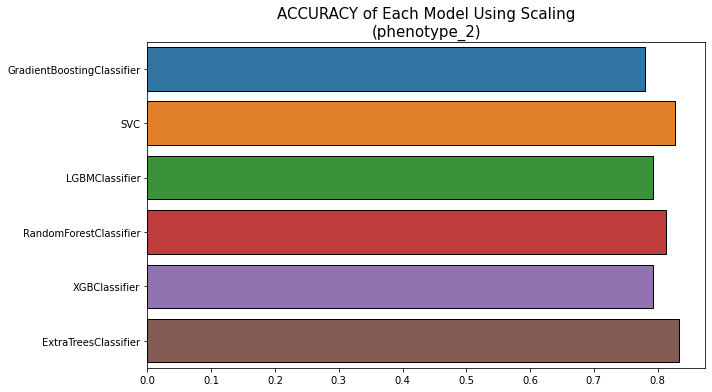

In [44]:
plt.figure(figsize = (10, 6))
plt.title('ACCURACY of Each Model Using Scaling\n(phenotype_2)', size = 15)
sns.barplot(y = clf_model_names, x = stb2, edgecolor = (0, 0, 0))
plt.show()

### - PCA Features

In [45]:
from sklearn.decomposition import PCA

### Custom Function for Making PCA Data

In [46]:
def make_pca(x1, x2) :
    pca = PCA(n_components = 300)
    pca.fit(x1)
    comp = pca.transform(x1)
    pca_df = pd.DataFrame(comp, columns = [f'주성분{i}' for i in range(1, comp.shape[1] + 1)])
    loadings = pd.DataFrame(pca.components_.T, columns = [f'주성분{i}' for i in range(1, comp.shape[1] + 1)])
    ax = pd.DataFrame(pca_df.std()).T
    pca_summary = pd.concat([ax,pd.DataFrame(pca.explained_variance_ratio_).set_index(ax.columns).T])
    proportion = pca.explained_variance_ratio_
    s = 0
    result = []
    for i in range(len(proportion)) :
        s = s+ proportion[i]
        result.append(np.round(s,4))
    pca_summary.loc[1] = result
    pca_summary.index = ['표준편차', '변동량', '누적변동량']
    df = pca_summary.T
    pca_n = int(df[df.누적변동량 >= 0.85].index[0][-3:])
    pca = PCA(n_components = pca_n, random_state = 613)
    pca_X = pca.fit_transform(x1)
    pca_target = pca.transform(x2)
    return pca_X, pca_target

In [47]:
pca_X, pca_target = make_pca(X, target)

In [48]:
pca_X_scaled, pca_target_scaled = make_pca(scaled_x, scaled_target)

- Only PCA - Regression

In [49]:
tc1 = get_rmse(pca_X, y_c1, pca_target, target_c1)

GradientBoostingRegressor의 RMSE : 0.7796937512345223
SVR의 RMSE : 0.73660936903356
LGBMRegressor의 RMSE : 0.7505109522307772
RandomForestRegressor의 RMSE : 0.7793093344591416
ExtraTreesRegressor의 RMSE : 0.8032954065180028
AdaBoostRegressor의 RMSE : 0.7831820727886688
XGBRegressor의 RMSE : 0.8218536058889407


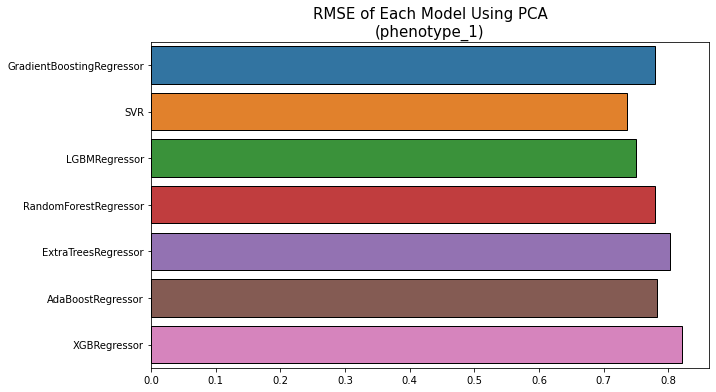

In [50]:
plt.figure(figsize = (10, 6))
plt.title('RMSE of Each Model Using PCA\n(phenotype_1)', size = 15)
sns.barplot(y = reg_model_names, x = tc1, edgecolor = (0, 0, 0))
plt.show()

In [51]:
tc2 = get_rmse(pca_X, y_c2, pca_target, target_c2)

GradientBoostingRegressor의 RMSE : 1.165433318758262
SVR의 RMSE : 1.126560363503142
LGBMRegressor의 RMSE : 1.156194937950534
RandomForestRegressor의 RMSE : 1.1283606046249701
ExtraTreesRegressor의 RMSE : 1.108551030669999
AdaBoostRegressor의 RMSE : 1.1419514760293688
XGBRegressor의 RMSE : 1.2898062422522458


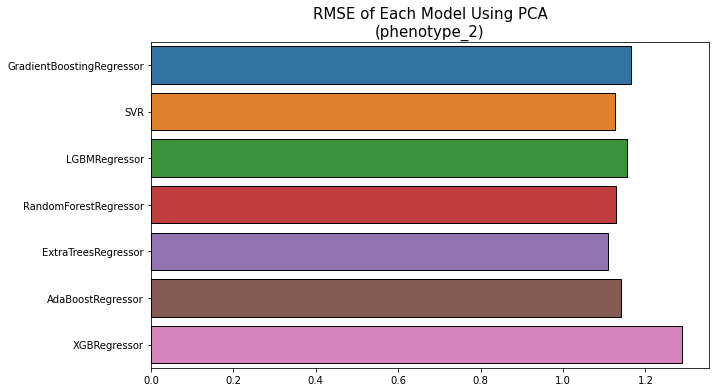

In [52]:
plt.figure(figsize = (10, 6))
plt.title('RMSE of Each Model Using PCA\n(phenotype_2)', size = 15)
sns.barplot(y = reg_model_names, x = tc2, edgecolor = (0, 0, 0))
plt.show()

- PCA + Scaling - regression

In [53]:
tc1 = get_rmse(pca_X_scaled, y_c1, pca_target_scaled, target_c1)

GradientBoostingRegressor의 RMSE : 0.7994790462662513
SVR의 RMSE : 0.7262839268787769
LGBMRegressor의 RMSE : 0.7656504180875722
RandomForestRegressor의 RMSE : 0.7730051984847325
ExtraTreesRegressor의 RMSE : 0.7816377828893102
AdaBoostRegressor의 RMSE : 0.7863179963630704
XGBRegressor의 RMSE : 0.8345572400139228


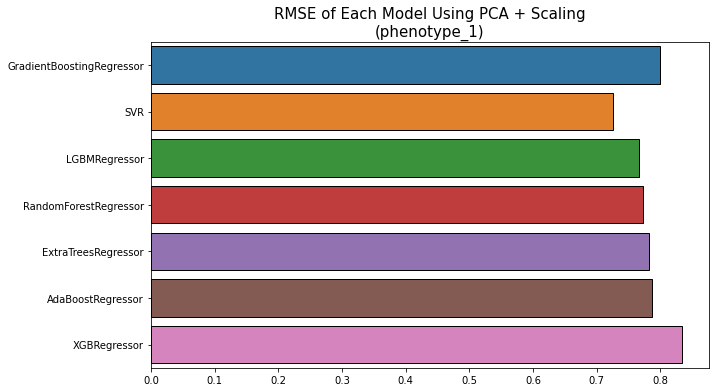

In [54]:
plt.figure(figsize = (10, 6))
plt.title('RMSE of Each Model Using PCA + Scaling\n(phenotype_1)', size = 15)
sns.barplot(y = reg_model_names, x = tc1, edgecolor = (0, 0, 0))
plt.show()

In [55]:
tc2 = get_rmse(pca_X_scaled, y_c2, pca_target_scaled, target_c2)

GradientBoostingRegressor의 RMSE : 1.1251371409798063
SVR의 RMSE : 1.132965182481076
LGBMRegressor의 RMSE : 1.1455693837875578
RandomForestRegressor의 RMSE : 1.1119440046095448
ExtraTreesRegressor의 RMSE : 1.0881850487285327
AdaBoostRegressor의 RMSE : 1.1458924454202046
XGBRegressor의 RMSE : 1.13645593377358


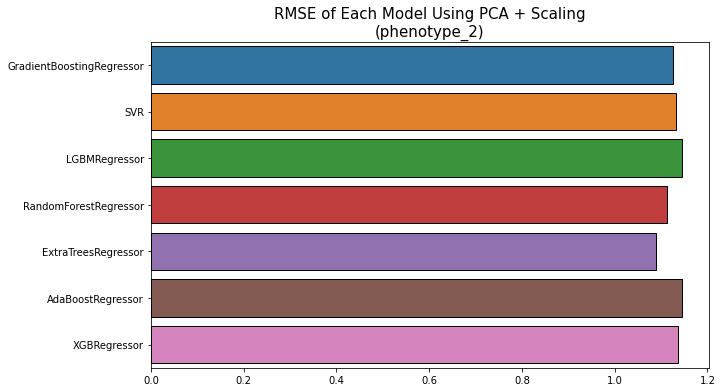

In [56]:
plt.figure(figsize = (10, 6))
plt.title('RMSE of Each Model Using PCA + Scaling\n(phenotype_2)', size = 15)
sns.barplot(y = reg_model_names, x = tc2, edgecolor = (0, 0, 0))
plt.show()

- Only PCA - Classification

In [57]:
tb1 = get_acc(pca_X, y_b1, pca_target, target_b1)

GradientBoostingClassifier의 accuracy : 0.8066666666666666
SVC의 accuracy : 0.8066666666666666
LGBMClassifier의 accuracy : 0.8066666666666666
RandomForestClassifier의 accuracy : 0.8066666666666666
[16:12:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier의 accuracy : 0.7933333333333333
ExtraTreesClassifier의 accuracy : 0.8


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


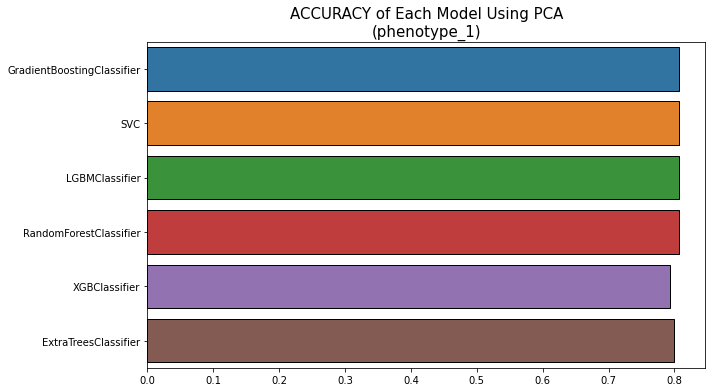

In [58]:
plt.figure(figsize = (10, 6))
plt.title('ACCURACY of Each Model Using PCA\n(phenotype_1)', size = 15)
sns.barplot(y = clf_model_names, x = tb1, edgecolor = (0, 0, 0))
plt.show()

In [59]:
tb2 = get_acc(pca_X, y_b2, pca_target, target_b2)

GradientBoostingClassifier의 accuracy : 0.8266666666666667
SVC의 accuracy : 0.8266666666666667
LGBMClassifier의 accuracy : 0.76
RandomForestClassifier의 accuracy : 0.8266666666666667
[16:12:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier의 accuracy : 0.78
ExtraTreesClassifier의 accuracy : 0.8266666666666667


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


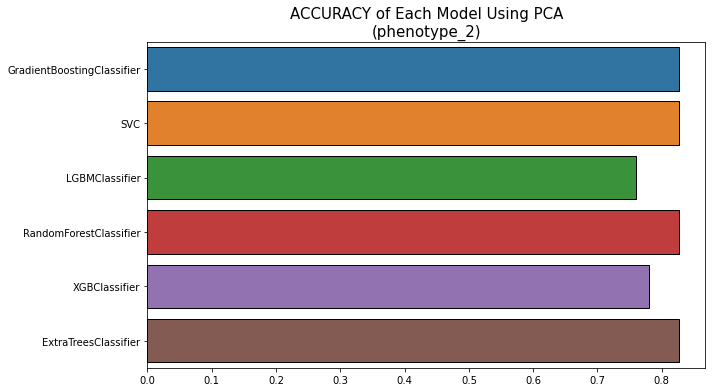

In [60]:
plt.figure(figsize = (10, 6))
plt.title('ACCURACY of Each Model Using PCA\n(phenotype_2)', size = 15)
sns.barplot(y = clf_model_names, x = tb2, edgecolor = (0, 0, 0))
plt.show()

- PCA + Scaling - Classfication

In [61]:
tb1 = get_acc(pca_X_scaled, y_b1, pca_target_scaled, target_b1)

GradientBoostingClassifier의 accuracy : 0.7933333333333333
SVC의 accuracy : 0.8066666666666666
LGBMClassifier의 accuracy : 0.7933333333333333
RandomForestClassifier의 accuracy : 0.8
[16:12:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier의 accuracy : 0.78
ExtraTreesClassifier의 accuracy : 0.8


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


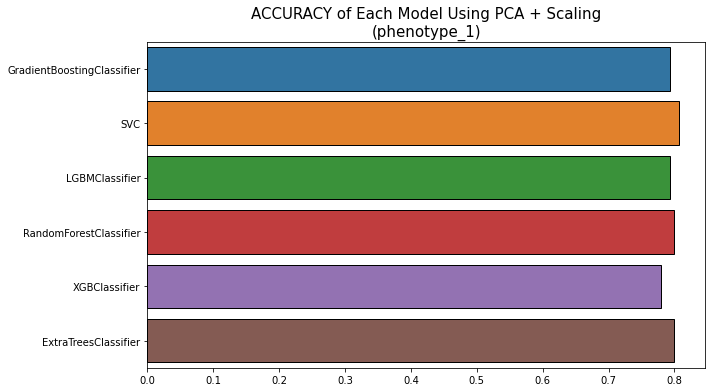

In [62]:
plt.figure(figsize = (10, 6))
plt.title('ACCURACY of Each Model Using PCA + Scaling\n(phenotype_1)', size = 15)
sns.barplot(y = clf_model_names, x = tb1, edgecolor = (0, 0, 0))
plt.show()

In [63]:
tb2 = get_acc(pca_X_scaled, y_b2, pca_target_scaled, target_b2)

GradientBoostingClassifier의 accuracy : 0.8266666666666667
SVC의 accuracy : 0.8266666666666667
LGBMClassifier의 accuracy : 0.8133333333333334
RandomForestClassifier의 accuracy : 0.8266666666666667
[16:12:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier의 accuracy : 0.8266666666666667
ExtraTreesClassifier의 accuracy : 0.8266666666666667


/Users/kisehyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


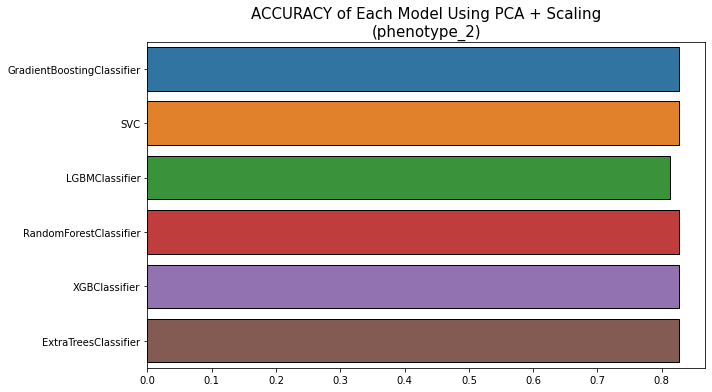

In [64]:
plt.figure(figsize = (10, 6))
plt.title('ACCURACY of Each Model Using PCA + Scaling\n(phenotype_2)', size = 15)
sns.barplot(y = clf_model_names, x = tb2, edgecolor = (0, 0, 0))
plt.show()

## Deep Learning - DNN

In [21]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop # 대표적인 최적화 방식 2가지 사용
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau # 차례대로 학습조기종료, 모델저장, 학습률 조정 callback

#### Only Scaling - Regression

In [22]:
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim = 1000, activation = 'relu')) # PCA를 적용하지 않은 데이터를 사용하기 때문에 기존 column수인 1000을 차원으로 입력
dnn_model.add(Dense(4, activation = 'relu'))
dnn_model.add(Dense(1)) # 회귀 문제이기 때문에 마지막 출력층에는 activation 설정 필요 x
dnn_model.compile(loss = 'mse', optimizer = Adam(learning_rate = .0005)) # 회귀 문제이기 때문에 loss를 mse로 지정

In [23]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 100, verbose = 1) # val_loss 즉 검증데이터의 mse가 100epoch이내에 개선되지 않으면 학습 종료
lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.8, patience = 30, verbose = 1, mode = 'min') # 30epoch이내에 mse가 개선되지 않으면 학습률을 기존 학습률의 80% 수준으로 감소
mc = ModelCheckpoint(f'DNN.h5', save_best_only = True, verbose = 1, mode = 'min', monitor = 'val_loss') # mse가 가장 낮을 때의 모델을 저장

In [24]:
history = dnn_model.fit(scaled_x, y_c1, validation_split = .1, epochs = 400, callbacks = [es, lr, mc], verbose = 1) # 총 400epoch 학습, 전체 데이터 중 10%를 검증 데이터로 사용 callback 파라미터를 위의 3가지 callbacks 함수로 지정

Epoch 1/400
9/9 [==============================] - 1s 39ms/step - loss: 0.8699 - val_loss: 0.9126

Epoch 00001: val_loss improved from inf to 0.91261, saving model to optimum_DNN.h5
Epoch 2/400
9/9 [==============================] - 0s 5ms/step - loss: 0.8751 - val_loss: 0.9126

Epoch 00002: val_loss improved from 0.91261 to 0.91258, saving model to optimum_DNN.h5
Epoch 3/400
9/9 [==============================] - 0s 4ms/step - loss: 0.8751 - val_loss: 0.9127

Epoch 00003: val_loss did not improve from 0.91258
Epoch 4/400
9/9 [==============================] - 0s 4ms/step - loss: 0.8751 - val_loss: 0.9127

Epoch 00004: val_loss did not improve from 0.91258
Epoch 5/400
9/9 [==============================] - 0s 5ms/step - loss: 0.8751 - val_loss: 0.9128

Epoch 00005: val_loss did not improve from 0.91258
Epoch 6/400
9/9 [==============================] - 0s 4ms/step - loss: 0.8751 - val_loss: 0.9128

Epoch 00006: val_loss did not improve from 0.91258
Epoch 7/400
9/9 [====================

In [25]:
mse = history.history['loss']
val_mse = history.history['val_loss']

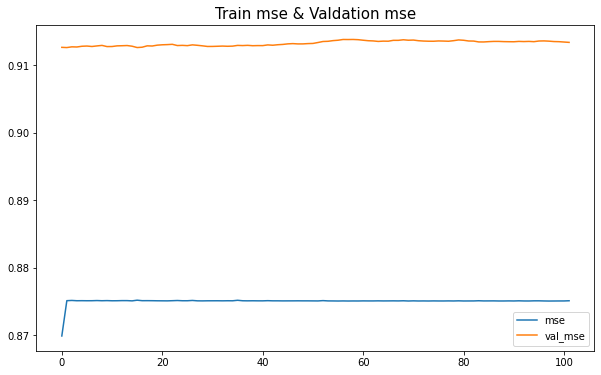

In [26]:
plt.figure(figsize = (10, 6))
plt.title('Train mse & Valdation mse', size = 15)
plt.plot(mse, label = 'mse')
plt.plot(val_mse, label = 'val_mse')
plt.legend()
plt.show()

In [27]:
model = load_model('DNN.h5')

In [28]:
pred = model.predict(scaled_target)

In [30]:
rmse = mean_squared_error(target_c1, pred) ** .5

In [32]:
print(f'DNN 모델의 RMSE는 {rmse}')

DNN 모델의 RMSE는 0.9005225059126895


In [36]:
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim = 1000, activation = 'relu'))
dnn_model.add(Dense(4, activation = 'relu'))
dnn_model.add(Dense(1))
dnn_model.compile(loss = 'mse', optimizer = RMSprop(learning_rate = .0005))

In [37]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 100, verbose = 1)
lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.8, patience = 30, verbose = 1, mode = 'min')
mc = ModelCheckpoint(f'optimum_DNN.h5', save_best_only = True, verbose = 1, mode = 'min', monitor = 'val_loss')

In [38]:
history = dnn_model.fit(scaled_x, y_c2, validation_split = .1, epochs = 400, callbacks = [es, lr, mc], verbose = 1)

Epoch 1/400
9/9 [==============================] - 1s 19ms/step - loss: 1.0984 - val_loss: 0.9694

Epoch 00001: val_loss improved from inf to 0.96941, saving model to optimum_DNN.h5
Epoch 2/400
9/9 [==============================] - 0s 5ms/step - loss: 0.9777 - val_loss: 0.9694

Epoch 00002: val_loss did not improve from 0.96941
Epoch 3/400
9/9 [==============================] - 0s 4ms/step - loss: 0.9779 - val_loss: 0.9694

Epoch 00003: val_loss did not improve from 0.96941
Epoch 4/400
9/9 [==============================] - 0s 5ms/step - loss: 0.9775 - val_loss: 0.9694

Epoch 00004: val_loss improved from 0.96941 to 0.96937, saving model to optimum_DNN.h5
Epoch 5/400
9/9 [==============================] - 0s 5ms/step - loss: 0.9776 - val_loss: 0.9691

Epoch 00005: val_loss improved from 0.96937 to 0.96910, saving model to optimum_DNN.h5
Epoch 6/400
9/9 [==============================] - 0s 6ms/step - loss: 0.9775 - val_loss: 0.9690

Epoch 00006: val_loss improved from 0.96910 to 0.969

In [39]:
mse = history.history['loss']
val_mse = history.history['val_loss']

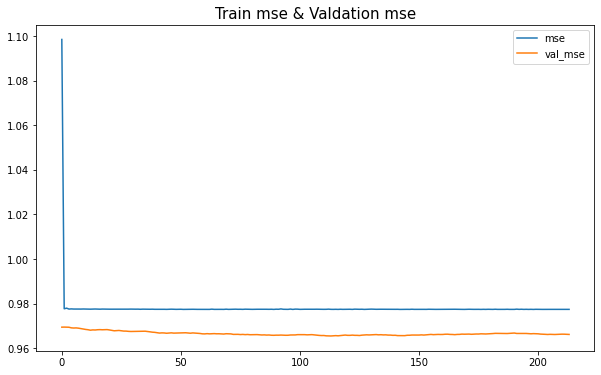

In [40]:
plt.figure(figsize = (10, 6))
plt.title('Train mse & Valdation mse', size = 15)
plt.plot(mse, label = 'mse')
plt.plot(val_mse, label = 'val_mse')
plt.legend()
plt.show()

In [41]:
model = load_model('DNN.h5')

In [42]:
pred = model.predict(scaled_target)

In [43]:
rmse = mean_squared_error(target_c2, pred) ** .5

In [44]:
print(f'DNN 모델의 RMSE는 {rmse}')

DNN 모델의 RMSE는 1.0640959487584598


#### Only Scaling - Classification

In [ ]:
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim = 1000, activation = 'relu'))
dnn_model.add(Dense(32, activation = 'relu'))
dnn_model.add(Dropout(.15))
dnn_model.add(Dense(1, activation = 'sigmoid'))
dnn_model.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = RMSprop(learning_rate = .001))

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 100, verbose = 1)
lr = ReduceLROnPlateau(monitor='val_acc', factor = 0.8, patience = 30, verbose = 1, mode = 'max')
mc = ModelCheckpoint(f'DNN.h5', save_best_only = True, verbose = 1, mode = 'max', monitor = 'val_acc')

In [ ]:
history = dnn_model.fit(scaled_x, y_b1, validation_split = .1, epochs = 400, callbacks = [es, lr, mc], verbose = 1)

Epoch 1/400
9/9 [==============================] - 1s 22ms/step - loss: 0.6565 - acc: 0.7407 - val_loss: 0.5125 - val_acc: 0.8000

Epoch 00001: val_acc improved from -inf to 0.80000, saving model to optimum_DNN.h5
Epoch 2/400
9/9 [==============================] - 0s 5ms/step - loss: 0.5141 - acc: 0.7926 - val_loss: 0.5028 - val_acc: 0.8000

Epoch 00002: val_acc did not improve from 0.80000
Epoch 3/400
9/9 [==============================] - 0s 5ms/step - loss: 0.5254 - acc: 0.7963 - val_loss: 0.4879 - val_acc: 0.8000

Epoch 00003: val_acc did not improve from 0.80000
Epoch 4/400
9/9 [==============================] - 0s 5ms/step - loss: 0.5167 - acc: 0.8037 - val_loss: 0.5111 - val_acc: 0.8000

Epoch 00004: val_acc did not improve from 0.80000
Epoch 5/400
9/9 [==============================] - 0s 5ms/step - loss: 0.5052 - acc: 0.8000 - val_loss: 0.5123 - val_acc: 0.8000

Epoch 00005: val_acc did not improve from 0.80000
Epoch 6/400
9/9 [==============================] - 0s 6ms/step - l

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

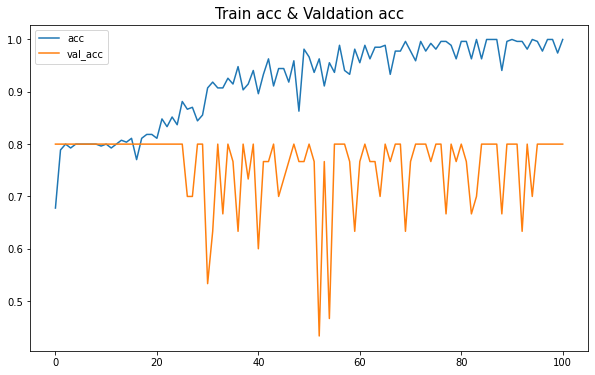

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('Train acc & Valdation acc', size = 15)
plt.plot(acc, label = 'acc')
plt.plot(val_acc, label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

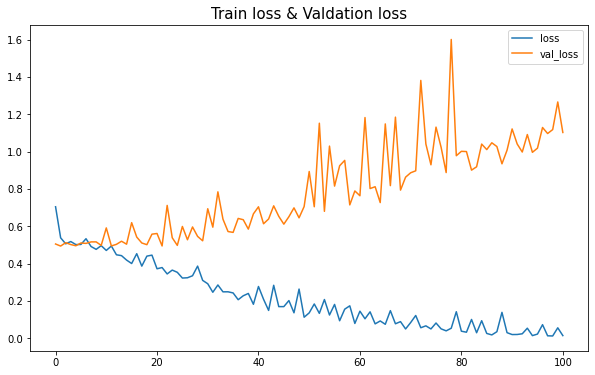

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('Train loss & Valdation loss', size = 15)
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
model = load_model('DNN.h5')

In [ ]:
pred = model.predict(scaled_target)

In [ ]:
label = [1 if pred[i][0] > .4 else 0 for i in range(len(pred))]

In [ ]:
print(f'DNN 모델의 test 정확도는 {accuracy_score(target_b1, label)}')

DNN 모델의 test 정확도는 0.8


#### Scaling + PCA - Classfication

In [ ]:
dnn_model = Sequential()
dnn_model.add(Dense(64, input_dim = 160, activation = 'relu'))
dnn_model.add(Dense(8, activation = 'relu'))
dnn_model.add(Dropout(.15))
dnn_model.add(Dense(1, activation = 'sigmoid'))
dnn_model.compile(loss = 'binary_crossentropy', metrics = ['acc'], optimizer = RMSprop(learning_rate = .001))

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 100, verbose = 1)
lr = ReduceLROnPlateau(monitor='val_acc', factor = 0.8, patience = 30, verbose = 1, mode = 'max')
mc = ModelCheckpoint(f'optimum_DNN.h5', save_best_only = True, verbose = 1, mode = 'max', monitor = 'val_acc')

In [ ]:
history = dnn_model.fit(pca_X_scaled, y_b2, validation_split = .1, epochs = 400, callbacks = [es, lr, mc], verbose = 1)

Epoch 1/400
9/9 [==============================] - 1s 23ms/step - loss: 0.7491 - acc: 0.4259 - val_loss: 0.7107 - val_acc: 0.6000

Epoch 00001: val_acc improved from -inf to 0.60000, saving model to optimum_DNN.h5
Epoch 2/400
9/9 [==============================] - 0s 6ms/step - loss: 0.6036 - acc: 0.6815 - val_loss: 0.6632 - val_acc: 0.6000

Epoch 00002: val_acc did not improve from 0.60000
Epoch 3/400
9/9 [==============================] - 0s 5ms/step - loss: 0.5402 - acc: 0.7815 - val_loss: 0.6384 - val_acc: 0.6000

Epoch 00003: val_acc did not improve from 0.60000
Epoch 4/400
9/9 [==============================] - 0s 5ms/step - loss: 0.4868 - acc: 0.8593 - val_loss: 0.6154 - val_acc: 0.6333

Epoch 00004: val_acc improved from 0.60000 to 0.63333, saving model to optimum_DNN.h5
Epoch 5/400
9/9 [==============================] - 0s 4ms/step - loss: 0.4564 - acc: 0.8296 - val_loss: 0.6000 - val_acc: 0.7000

Epoch 00005: val_acc improved from 0.63333 to 0.70000, saving model to optimum_D

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

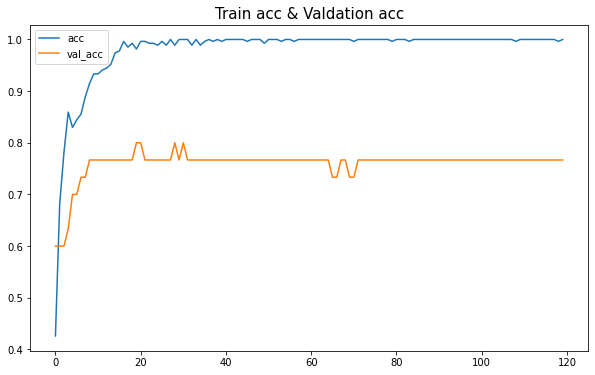

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('Train acc & Valdation acc', size = 15)
plt.plot(acc, label = 'acc')
plt.plot(val_acc, label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

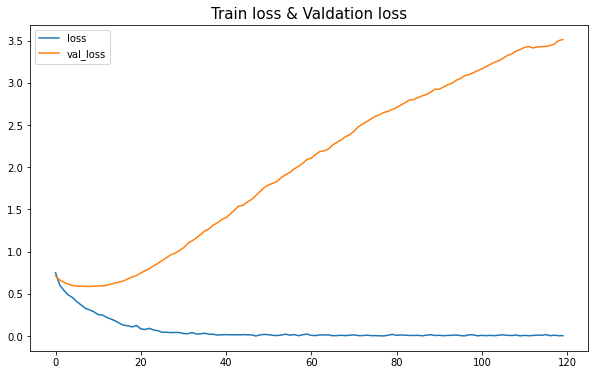

In [ ]:
plt.figure(figsize = (10, 6))
plt.title('Train loss & Valdation loss', size = 15)
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend()
plt.show()

In [ ]:
model = load_model('DNN.h5')

In [ ]:
pred = model.predict(pca_target_scaled)

In [ ]:
label = [1 if pred[i][0] > .4 else 0 for i in range(len(pred))]

In [ ]:
print(f'DNN 모델의 test 정확도는 {accuracy_score(target_b2, label)}')

DNN 모델의 test 정확도는 0.8
